In [2]:
# Importação das bibliotecas 
import numpy as np # Essa biblioteca consiste em objetos chamados de arrays (matrizes), que são multidimensionais
import pandas as pd # Biblioteca que oferece estruturas e operações para manipular tabelas numéricas e séries temporais
import matplotlib.pyplot as plt # Biblioteca é utilizada para criação de gráficos e visualização de dados
import tensorflow as tf # Biblioteca para computação numérica usando grafos de fluxo de dados para um rede neural
import seaborn as sns # Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
import os # Biblioteca de comandos do sistema operacional utilizada para fazer automação de processos no Python
import glob # É usado para retornar todos os caminhos de arquivo que correspondem a um padrão específico.
import plotly.graph_objects as go # Biblioteca de gráficos interativos com qualidade de publicação
import cv2 # É uma biblioteca que possui funções de manipulações básicas de imagens e vídeos, desde o carregamento de arquivos.
import warnings # Biblioteca responsavel por gerar avisos
from PIL import Image # Oferece amplo suporte a formatos de arquivo, uma representação interna eficiente e recursos de processamento de imagem bastante poderosos,
from PIL import ImageFile # Módulo que fornece funções para  abrir e e salvar as imagem.
from sklearn.model_selection import train_test_split # Este módulo tem o proposito de divida matrizes de formma aleatória em treinamento e teste.
from sklearn.preprocessing import LabelEncoder # É uma classe de utilitário para ajudar a normalizar rótulos de forma que eles contenham apenas valores entre 0 e n_classes-1
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Importação das principais metricas
from tensorflow.keras.optimizers import Adam # Método que calcula as taxas de aprendizado adaptativo para cada parâmetro
from keras.preprocessing.image import ImageDataGenerator # Transforma as imagens aleatoriamente e retorna apenas os novos dados transformados
from keras.utils.np_utils import to_categorical # Converte um vetor de classe (inteiros) em uma matriz de classe binária.
from keras.applications.vgg16 import VGG16 # Modelo possui a capacidade de classificar objetos em fotografias
from keras.models import Sequential # Modelo é apropriado para uma pilha de camadas simples
from keras.layers import Dense, Flatten , Dropout # Camadas são os blocos de construção básicos das redes neurais no Keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint # Um retorno de chamada é um objeto que pode executar ações em vários estágios de treinamento
warnings.filterwarnings("ignore") # Biblioteca para tratar avisos
ImageFile.LOAD_TRUNCATED_IMAGES = True # Permiti o carregamento das imagens

In [3]:
# Carregando Dataset 

root_dir = 'D:\GIT\Projeto_2\dataset' # Acessando diretorio de onde está localizado o dataset que iremos trabalhar.
treino_dir = os.path.join(root_dir,'treino') # Método para unir um ou mais componentes de caminho de forma inteligente.
print('''Caminho do dadaset é : ''',treino_dir)
print()

tipo1_dir = os.path.join(treino_dir, 'tipo_1')# Acessando diretorio "Tipo_*", onde estão nosssa imagens.
tipo2_dir = os.path.join(treino_dir, 'tipo_2')
tipo3_dir = os.path.join(treino_dir, 'tipo_3')
print('''Caminho do dadaset para o tipo 1 é : ''',tipo1_dir)
print()

treino_tipo1_files = glob.glob(tipo1_dir+'/*.jpg') # Encontra todos os nomes de caminho que correspondem a um padrão especificado de acordo com as regras usadas pelo shell Unix
treino_tipo2_files = glob.glob(tipo2_dir+'/*.jpg')
treino_tipo3_files = glob.glob(tipo3_dir+'/*.jpg')


adicionar_tipo1_files  =  glob.glob(os.path.join(root_dir, "adicionar_tipo_1", "tipo_1")+'/*.jpg')
adicionar_tipo2_files  =  glob.glob(os.path.join(root_dir, "adicionar_tipo_2", "tipo_2")+'/*.jpg')
adicionar_tipo3_files  =  glob.glob(os.path.join(root_dir, "adicionar_tipo_3", "tipo_3")+'/*.jpg')


tipo1_files = treino_tipo1_files + adicionar_tipo1_files
tipo2_files = treino_tipo2_files + adicionar_tipo2_files
tipo3_files = treino_tipo3_files + adicionar_tipo3_files

print(f'''Foram adicionado {len(tipo1_files)} imagens do Tipo 1  
Foram adicionado {len(tipo2_files)} imagens do Tipo 2
Foram adicionado {len(tipo3_files)} imagens do Tipo 3''' )

Caminho do dadaset é :  D:\GIT\Projeto_2\dataset\treino

Caminho do dadaset para o tipo 1 é :  D:\GIT\Projeto_2\dataset\treino\tipo_1

Foram adicionado 589 imagens do Tipo 1  
Foram adicionado 567 imagens do Tipo 2
Foram adicionado 477 imagens do Tipo 3


In [4]:
# Criar dataframe dos arquivo e rótulos
arquivos = {'caminho': tipo1_files + tipo2_files + tipo3_files,
          'rotulos': ['Tipo 1']* len(tipo1_files) + ['Tipo 2']* len(tipo2_files) + ['Tipo 3']* len(tipo3_files)}

cance_df = pd.DataFrame(arquivos).sample(frac=1, random_state= 1).reset_index(drop=True)
cance_df

,caminho,rotulos
0,D:\GIT\Projeto_2\dataset\adicionar_tipo_3\tipo...,Tipo 3
1,D:\GIT\Projeto_2\dataset\adicionar_tipo_3\tipo...,Tipo 3
2,D:\GIT\Projeto_2\dataset\adicionar_tipo_1\tipo...,Tipo 1
3,D:\GIT\Projeto_2\dataset\treino\tipo_3\202.jpg,Tipo 3
4,D:\GIT\Projeto_2\dataset\adicionar_tipo_1\tipo...,Tipo 1
...,...,...
1628,D:\GIT\Projeto_2\dataset\treino\tipo_2\331.jpg,Tipo 2
1629,D:\GIT\Projeto_2\dataset\adicionar_tipo_2\tipo...,Tipo 2
1630,D:\GIT\Projeto_2\dataset\adicionar_tipo_2\tipo...,Tipo 2
1631,D:\GIT\Projeto_2\dataset\adicionar_tipo_1\tipo...,Tipo 1


In [5]:
# Describe(), método calcula e exibe estatísticas resumidas para um dataframe
cance_df.describe()

,caminho,rotulos
count,1633,1633
unique,1633,3
top,D:\GIT\Projeto_2\dataset\adicionar_tipo_3\tipo...,Tipo 1
freq,1,589


In [6]:
# Chegando arquivos dublicado
len(cance_df[cance_df.duplicated(subset=['caminho'])])

0

In [7]:
# Verificando se existe arquivos danificado
bad_files = []
for path in (cance_df['caminho'].values):
    try:
        img = Image.open(path)
    except:
        index = cance_df[cance_df['caminho']==path].index.values[0]
        bad_files.append(index)
print(len(bad_files))

0


In [8]:
# Deletando arquivos danificados
cance_df.drop(bad_files, inplace=True)

In [9]:
tipo_count = pd.DataFrame(cance_df['rotulos'].value_counts()).rename(columns= {'rotulos': 'quantidade'})
tipo_count

,quantidade
Tipo 1,589
Tipo 2,567
Tipo 3,477


In [10]:
# Grafico do dataset
pie_plot = go.Pie(labels= tipo_count.index.to_list(), values= tipo_count.values.flatten(),
                 hole= 0.2, text= tipo_count.index.to_list(), textposition='auto')
fig = go.Figure([pie_plot])
fig.update_layout(title_text='Distribuição do tipo de câncer do colo do útero', font_size=15, autosize=False, width=600, height=600)
fig.show()


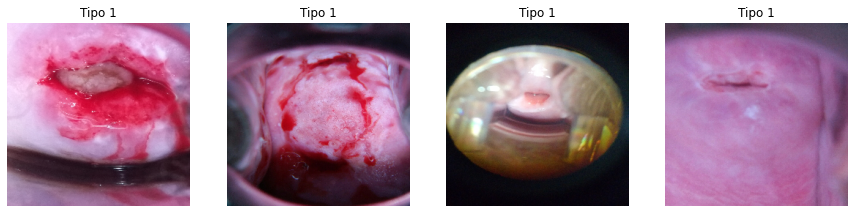

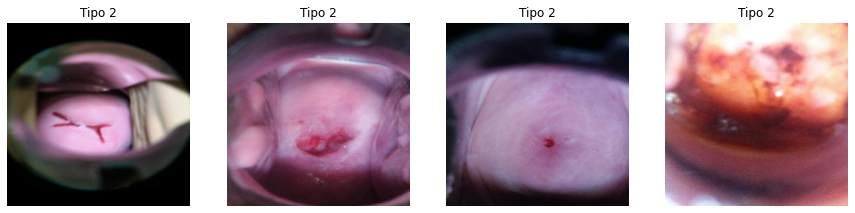

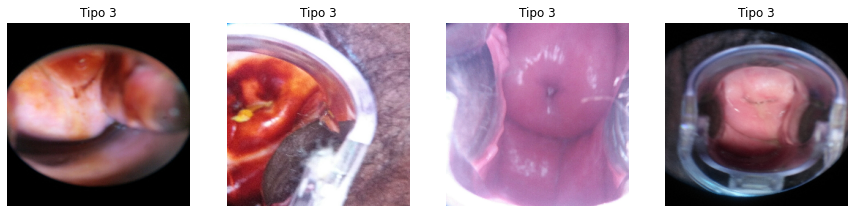

In [11]:
# Exemplo de imagens por tipo
for rotulo in ('Tipo 1', 'Tipo 2', 'Tipo 3'):
    filepaths = cance_df[cance_df['rotulos']==rotulo]['caminho'].values[:4]
    fig = plt.figure(figsize= (19, 10))
    for i, path in enumerate(filepaths):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (250, 250))
        fig.add_subplot(1, 5, i+1)
        plt.imshow(img)
        plt.subplots_adjust(hspace=0.5)
        plt.axis(False)
        plt.title(rotulo)

### Iniciaremos o processo de treinamento dos dados

In [12]:
# Está etapa iremos divide os dados em um conjunto de treinamento
# Para função train_test_split a opção test_size for do tipo int, representa o número absoluto de amostras. Se for do tipo Float, representar a proporção do conjunto de dados a ser incluído
# Para função train_test_split a opção stratify deve ser um array ou none, para nosso caso utilizaremos a dataframe.
# Para função train_test_split a opção random_state controla o embaralhamento aplicado aos dados antes de aplicar a divisão
treino_df, eval_df = train_test_split(cance_df, test_size= 0.2, stratify= cance_df['rotulos'], random_state= 1)
valida_df, teste_df = train_test_split(eval_df, test_size= 0.5, stratify= eval_df['rotulos'], random_state= 1)
print('Treino:', len(treino_df), ', Validacao:', len(valida_df), ', Teste:', len(teste_df))

Treino: 1306 , Validacao: 163 , Teste: 164


In [15]:
# Função para carrega as imagens para dataframe
def load_images(dataframe):
    features = []
    filepaths = dataframe['caminho'].values
    labels = dataframe['rotulos'].values
    
    for path in filepaths:
        img = cv2.imread(path)
        resized_img = cv2.resize(img, (180, 180))
        features.append(np.array(resized_img))
    return np.array(features), np.array(labels)

In [16]:
# Carregar dados de treinamento e de avaliação
treino_features, treino_labels = load_images(treino_df)
teste_features, teste_labels = load_images(teste_df)
valida_features, valida_labels = load_images(valida_df)

In [17]:
# Verifique a duração dos conjuntos de treinamento e avaliação
print('Treino features e labels: ', len(treino_features))
print('Teste features e labels: ', len(teste_features))
print('Valida features e labels', len(valida_features))

Treino features e labels:  1306
Teste features e labels:  164
Valida features e labels 163


In [18]:
# Normalizar os recursos
# Dividir os valores de pixel 255 é um forma de torma mais facil e rapida
X_treino = treino_features/255
X_valida  = valida_features/255
X_teste  = teste_features/255

In [19]:
# Codificar os rótulos
# A função LabelEncoder faz a conversão dos rotulos para um número.
le = LabelEncoder().fit(['Tipo 1', 'Tipo 2', 'Tipo 3'])
y_treino = le.transform(treino_labels)
y_valida = le.transform(valida_labels)
y_teste = le.transform(teste_labels)


In [20]:
# Verifique rótulos exclusivos
print ('Treino Y: ', np.unique(y_treino))
print ('Valida Y: ', np.unique(y_valida))
print ('Teste Y: ', np.unique(y_teste))



Treino Y:  [0 1 2]
Valida Y:  [0 1 2]
Teste Y:  [0 1 2]


In [26]:
# Utilizando o ImageDataGenerator para melhor o treinamento e avaliação. 
# A função ImageDataGenerator permite que você aumente suas imagens em tempo real enquanto seu modelo ainda está treinando.
treino_datagen = ImageDataGenerator(
                                rotation_range = 40,
                                zoom_range = 0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True,
                                vertical_flip = True)

eval_datagen = ImageDataGenerator()

In [27]:
# Aplicar a função a cima para melhor os recusos 
BATCH_SIZE= 32
train_gen = treino_datagen.flow(X_treino, y_treino, batch_size= BATCH_SIZE)
test_gen = eval_datagen.flow(X_teste, y_teste, batch_size= BATCH_SIZE)
val_gen = eval_datagen.flow(X_valida, y_valida, batch_size= BATCH_SIZE)

In [28]:
# Mostrar a forma de cada lote
for data_batch, labels_batch in train_gen:
    print('Forma do dados no lote: {} \n Forma do rotulos no lote: {}'.format(data_batch.shape, labels_batch.shape))
    break


Forma do dados no lote: (32, 180, 180, 3) 
 Forma do rotulos no lote: (32,)


Construção do modelo

In [29]:
# Inicializar a base do modelo vgg pré-treinado
# VGG utiliza camadas convolucionais 3 x 3 empilhadas umas sobre as outras com profundidade crescente. VGG16 significa que a rede tem 16 camadas.
conv_base = VGG16(weights= 'imagenet', include_top= False, input_shape= (180, 180, 3))

In [46]:
# Trainable_weights - Lista de aqueles que se destinam a ser atualizado (via descida gradiente) para minimizar a perda durante o treinamento.
print('Este é o número de pesos treináveis '
'antes de congelar camadas na base conv:', len(conv_base.trainable_weights))

Este é o número de pesos treináveis antes de congelar camadas na base conv: 2


In [44]:
# Congelar algumas camadas de modelo pré-treinado
for layer in conv_base.layers[:-5]:
    layer.trainable= False

In [45]:
print('Este é o número de pesos treináveis '
'após congelar as camadas na base conv:', len(conv_base.trainable_weights))

Este é o número de pesos treináveis após congelar as camadas na base conv: 2


In [49]:
# Modelo de construção
# Sequential modelo é apropriado para uma pilha de camadas simples, onde cada camada tem exactamente um tensor de entrada e um tensor de saída.
# Flatten é a função usada para achatar as entradas e também ao mesmo tempo manter o tamanho do lote igual.
# Envolve a omissão de neurônios que atuam como detectores de características da rede neural durante cada etapa de treinamento
# Dense esta função é usada para criar camadas totalmente conectadas, nas quais cada saída depende de cada entrada.
# Softmax pegará um vetor real como entrada e o converterá em um vetor de probabilidades categóricas
model = Sequential([conv_base, 
                    Flatten(),
                    Dropout(0.5),
                    Dense(3, activation='softmax')])

In [50]:
# Compilar modelo
# Adam é um método estocástico de gradiente descendente que se baseia na estimativa adaptativa de momentos de primeira e segunda ordem.
# Calcula a perda de entropia cruzada(se refere à diferença entre duas distribuições de probabilidade)
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 38403     
Total params: 14,753,091
Trainable params: 2,398,211
Non-trainable params: 12,354,880
_________________________________________________________________


In [52]:
# Definir etapas de treinamento
TRAIN_STEPS = len(treino_df)//BATCH_SIZE
VAL_STEPS = len(valida_df)//BATCH_SIZE

In [54]:
# initialize callbacks
# ReduceLROnPlateau reduza a taxa de aprendizado quando uma métrica parou de melhorar.
# EarlyStopping parar de treinar quando uma métrica monitorada parar de melhorar.
# ModelCheckpoint eetorno de chamada para salvar o modelo Keras ou os pesos do modelo em alguma frequência.
reduceLR = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose= 1, mode='min', factor=  0.1, min_lr = 1e-5)

early_stopping = EarlyStopping(monitor='val_loss', patience = 20, verbose=1, mode='min', restore_best_weights= True)

checkpoint = ModelCheckpoint('cervicalModel.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min')

In [55]:
historia = model.fit(train_gen, steps_per_epoch= TRAIN_STEPS, validation_data=val_gen, validation_steps=VAL_STEPS, epochs= 5,
                   callbacks= [reduceLR, early_stopping, checkpoint])

Epoch 1/5
40/40 [==============================] - ETA: 0s - loss: 1.3024 - accuracy: 0.3242 
Epoch 00001: val_loss improved from inf to 1.09924, saving model to cervicalModel.weights.hdf5
40/40 [==============================] - 448s 11s/step - loss: 1.3024 - accuracy: 0.3242 - val_loss: 1.0992 - val_accuracy: 0.3938
Epoch 2/5
40/40 [==============================] - ETA: 0s - loss: 1.1939 - accuracy: 0.3760 
Epoch 00002: val_loss did not improve from 1.09924
40/40 [==============================] - 476s 12s/step - loss: 1.1939 - accuracy: 0.3760 - val_loss: 1.1019 - val_accuracy: 0.3688
Epoch 3/5
40/40 [==============================] - ETA: 0s - loss: 1.1299 - accuracy: 0.4176 
Epoch 00003: val_loss improved from 1.09924 to 1.09201, saving model to cervicalModel.weights.hdf5
40/40 [==============================] - 554s 14s/step - loss: 1.1299 - accuracy: 0.4176 - val_loss: 1.0920 - val_accuracy: 0.4250
Epoch 4/5
40/40 [==============================] - ETA: 0s - loss: 1.0890 - accu

In [56]:
# Lendo o histórico do treinamento, e salavando em um dataframe
historia_df = pd.DataFrame(historia.history)

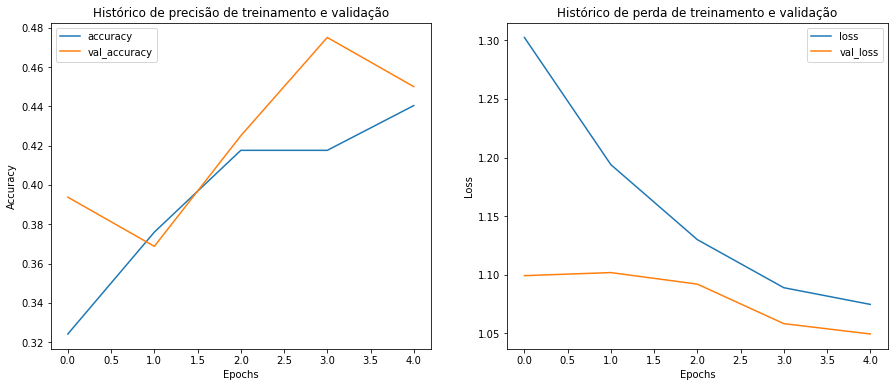

In [57]:
# Exibir histórico de treinamento e validação

# Exibir histórico da accurracy
plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
plt.plot(historia_df['accuracy'], label= 'accuracy' )
plt.plot(historia_df['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Histórico de precisão de treinamento e validação')
plt.legend()

# Exibir histórico de loss - perdas
plt.subplot(1,2,2)
plt.plot(historia_df['loss'], label= 'loss')
plt.plot(historia_df['val_loss'], label= 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Histórico de perda de treinamento e validação')
plt.legend()

plt.show()